In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 패키지 설치
!pip install koreanize-matplotlib matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 43.3 MB/s eta 0:00:00


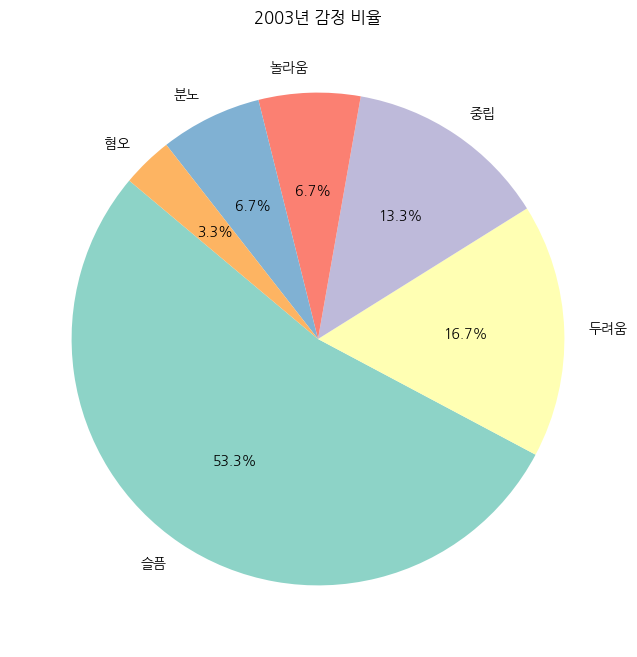

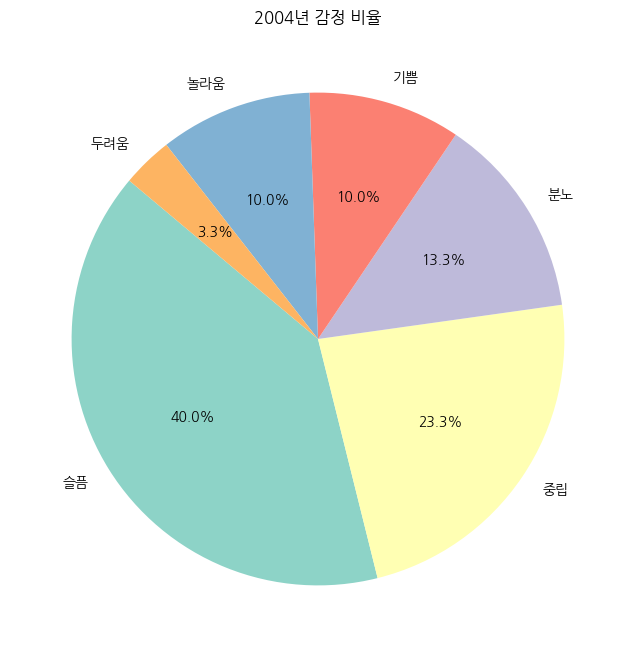

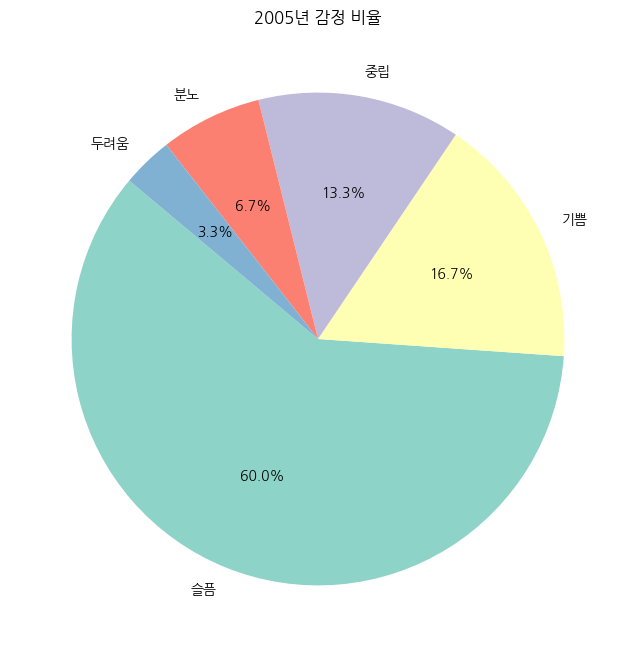

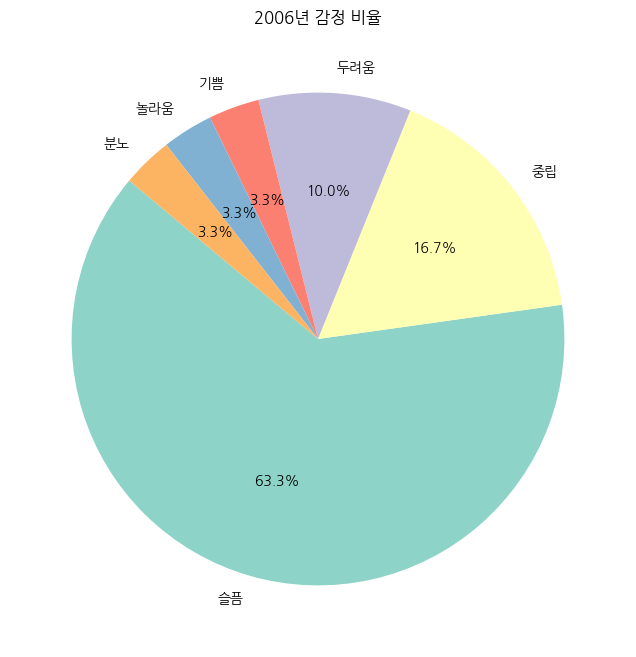

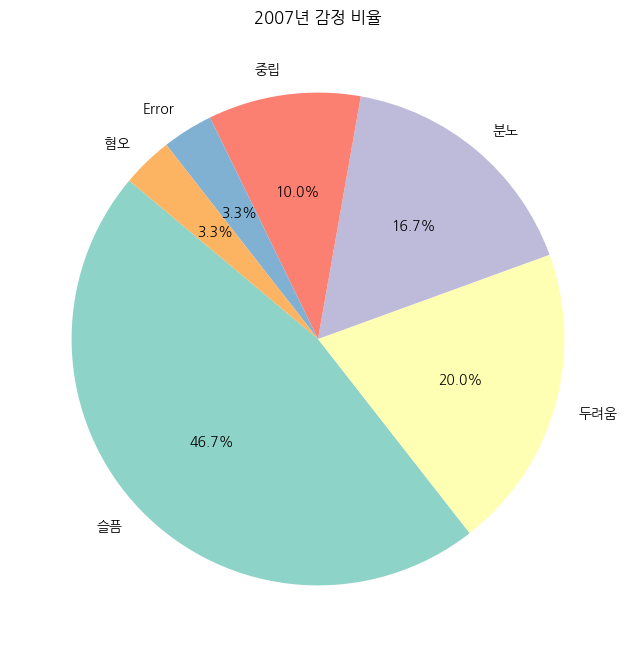

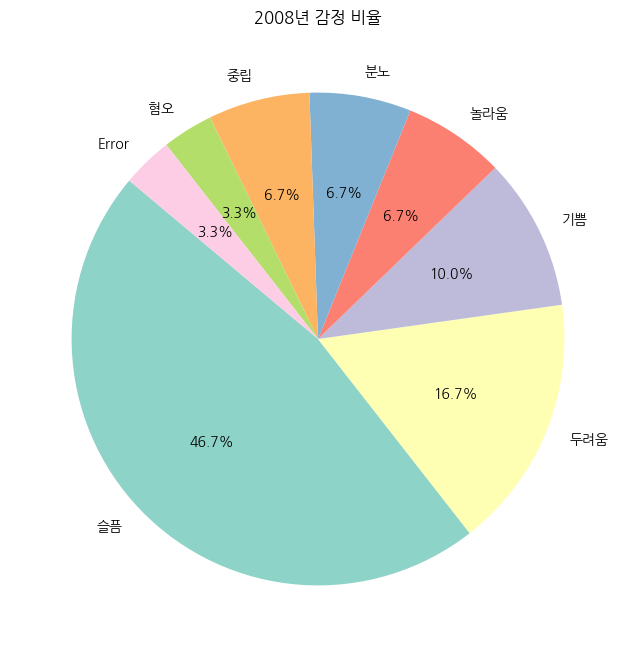

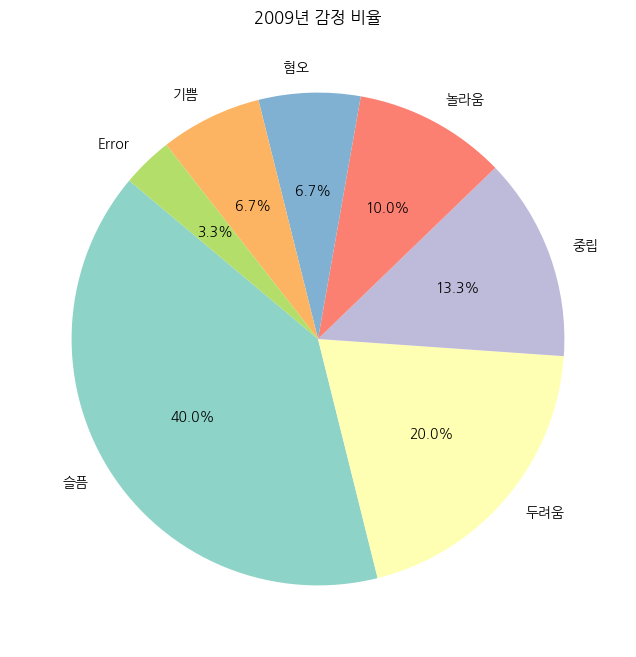

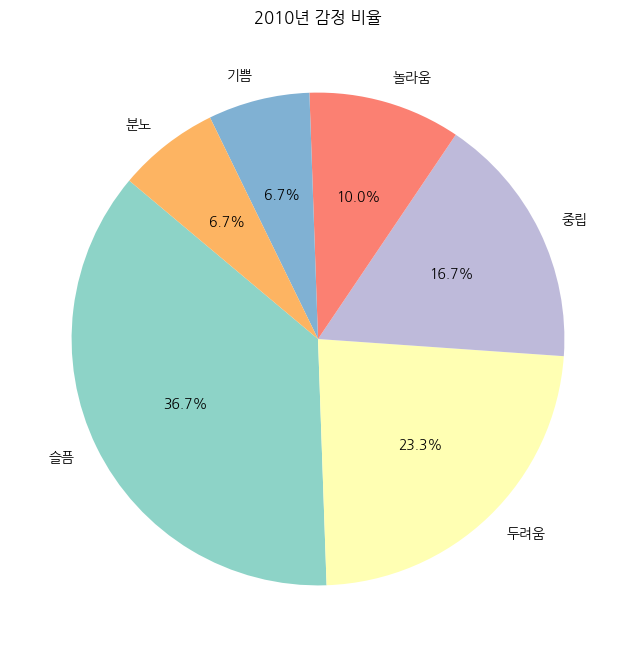

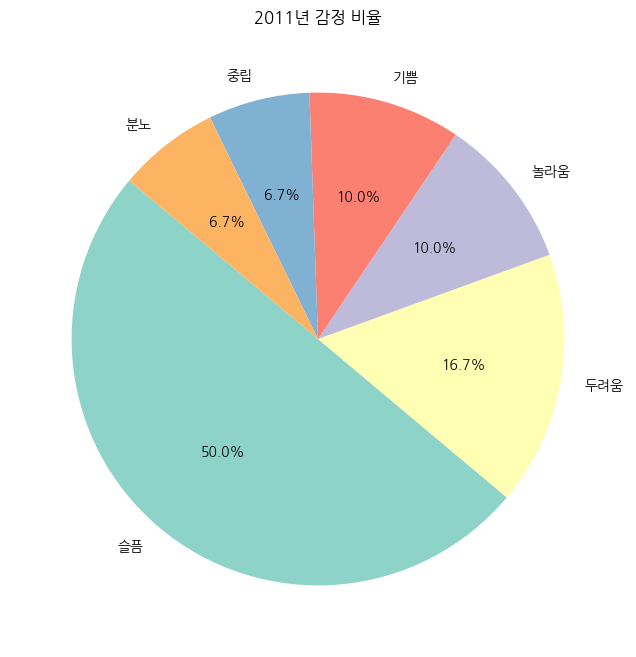

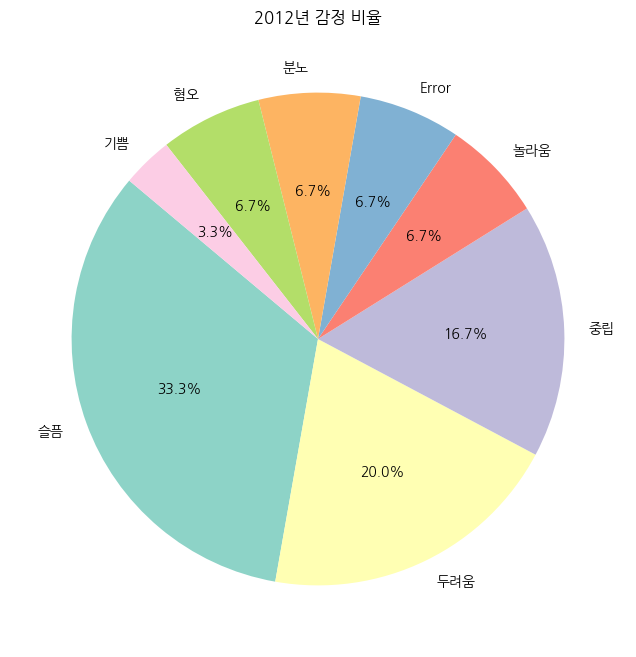

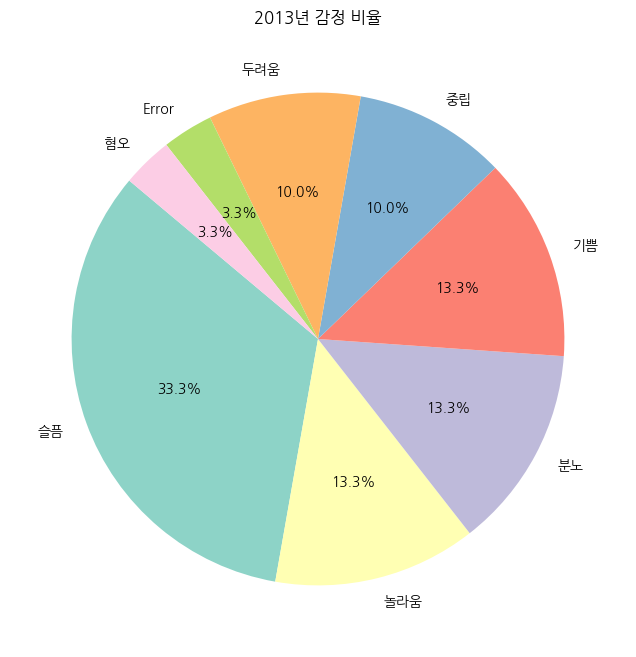

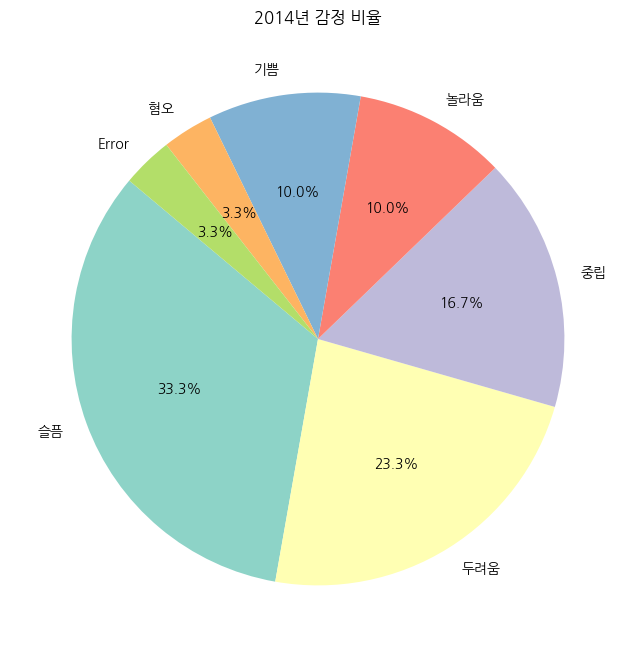

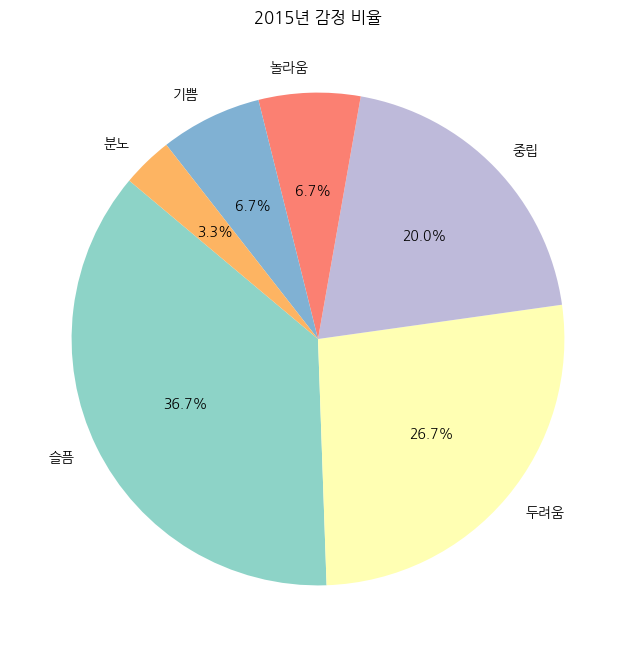

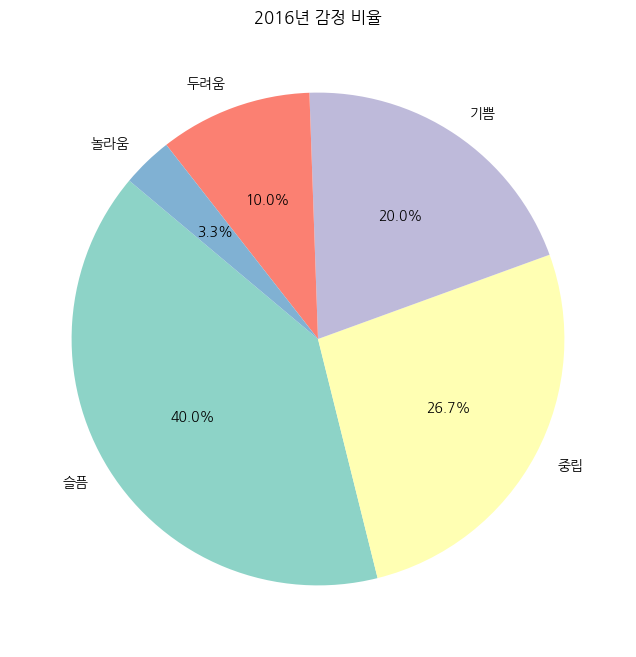

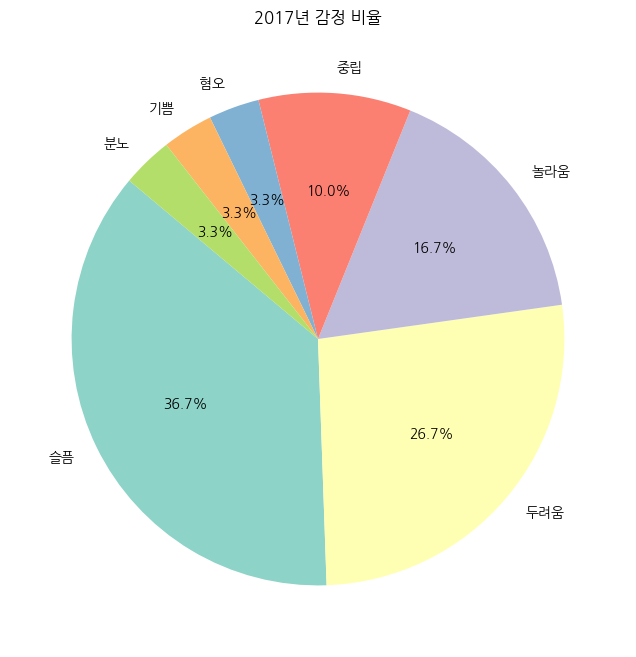

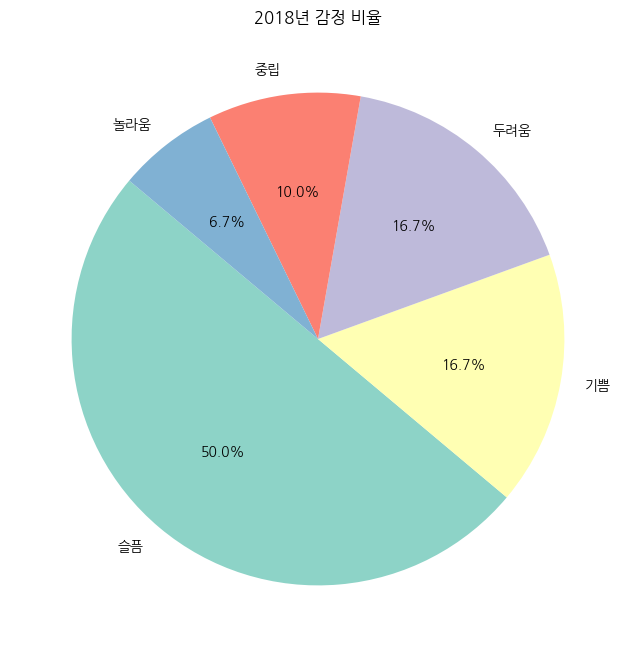

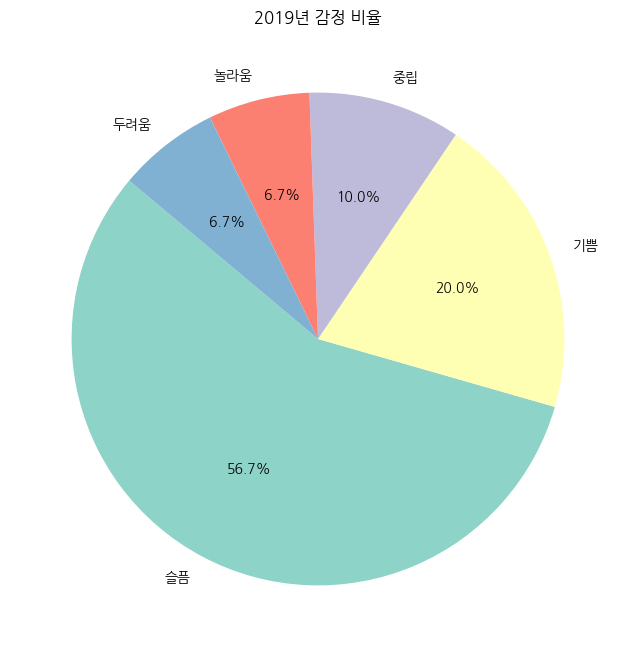

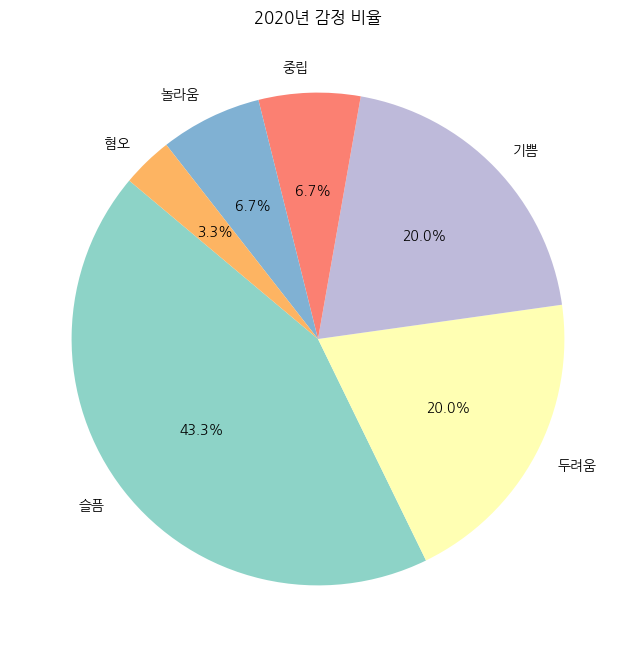

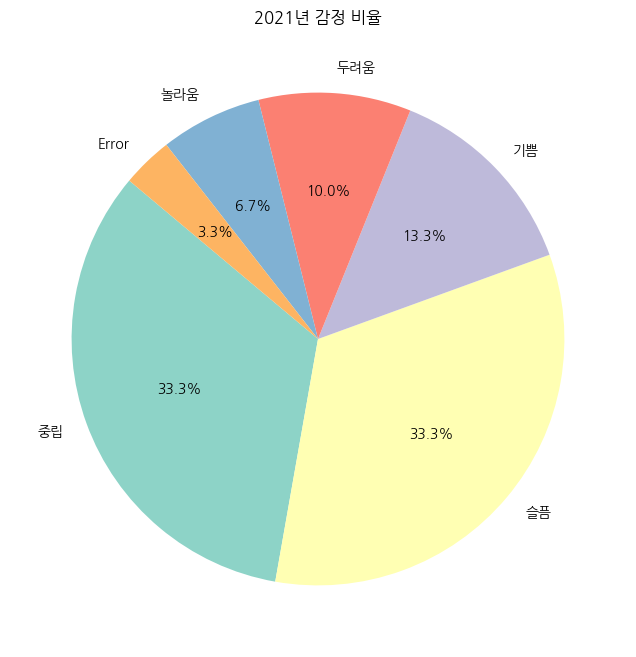

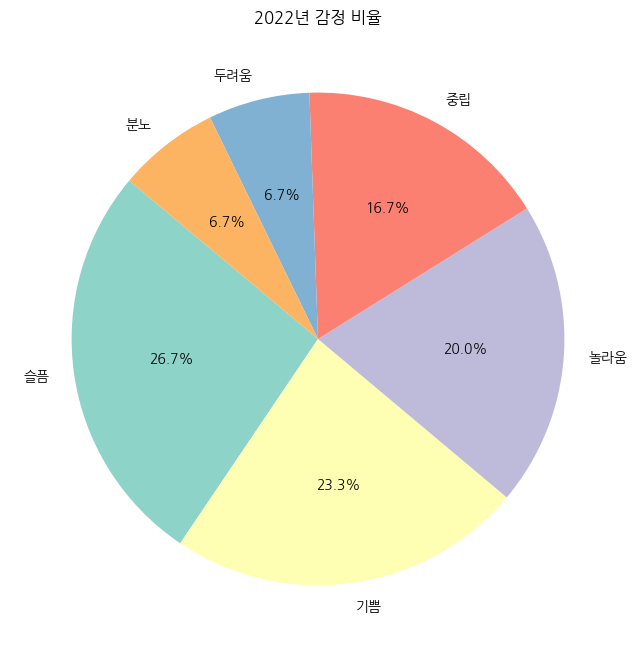

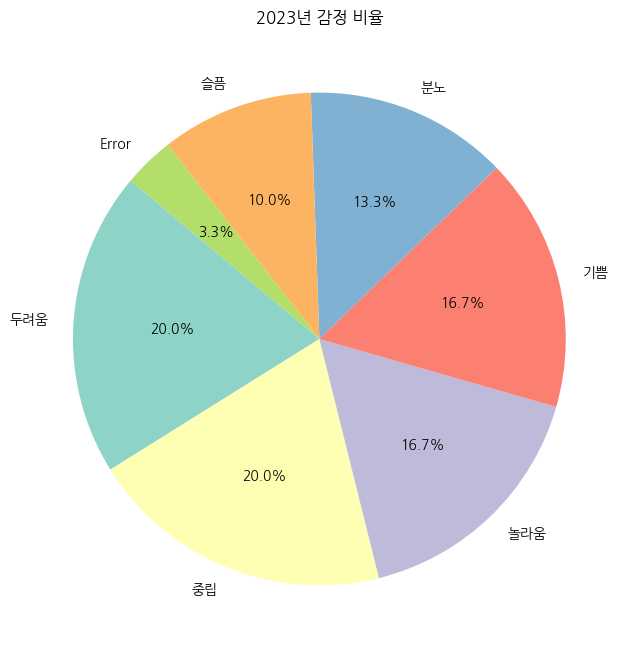

In [ ]:
# 라이브러리 불러오기
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# 연도 범위 설정
years = range(2003, 2024)

# 감정별 비율 계산 및 원형 차트 시각화
for year in years:
    # 파일 경로 설정
    file_path = f'/content/drive/MyDrive/DS/최종 프로젝트/감정분석/감정분석_결과_{year}.csv'

    # 파일 존재 여부 확인
    if not os.path.exists(file_path):
        print(f"{year}년 파일이 존재하지 않습니다: {file_path}")
        continue

    # 파일 읽기
    data = pd.read_csv(file_path)

    # 감정별 비율 계산
    emotion_counts = data['대표 감정'].value_counts(normalize=True)

    # 시각화 - 원형 차트
    plt.figure(figsize=(8, 8))
    plt.pie(
        emotion_counts,
        labels=emotion_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette("Set3", len(emotion_counts))
    )
    plt.title(f"{year}년 감정 비율")
    plt.show()

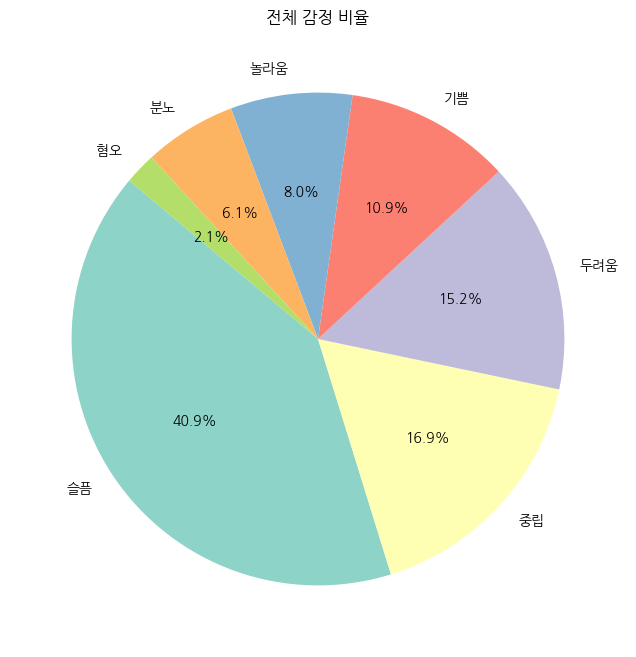

In [ ]:
# 파일 경로 설정
file_path = '/content/drive/MyDrive/DS/최종 프로젝트/감정분석/통합_감정분석_2003~2023.csv'

# 데이터 읽기
data = pd.read_csv(file_path)

# 감정별 비율 계산
emotion_counts = data['대표 감정'].value_counts(normalize=True)

# 시각화 - 원형 차트
plt.figure(figsize=(8, 8))
plt.pie(
    emotion_counts,
    labels=emotion_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("Set3", len(emotion_counts))
)
plt.title('전체 감정 비율')
plt.show()

In [ ]:
# 패키지 설치
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.8/493.8 kB 28.7 MB/s eta 0:00:00


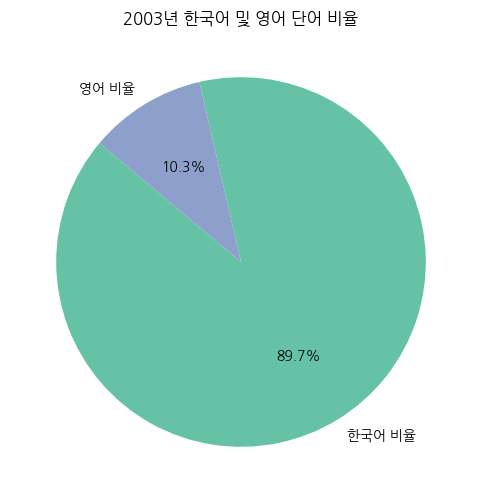

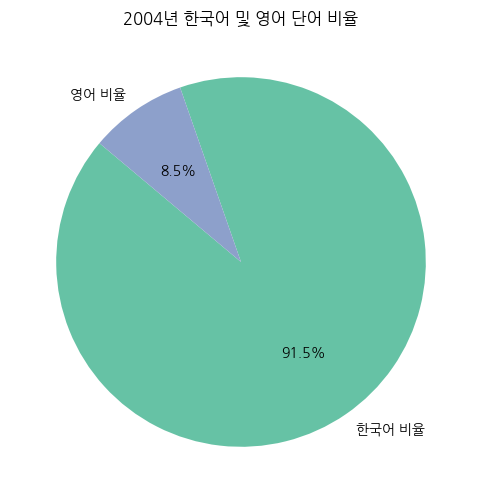

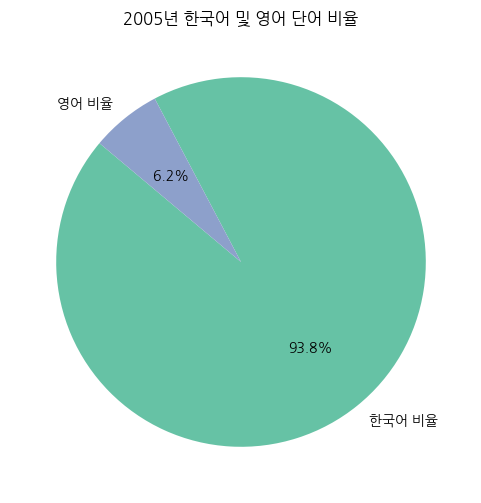

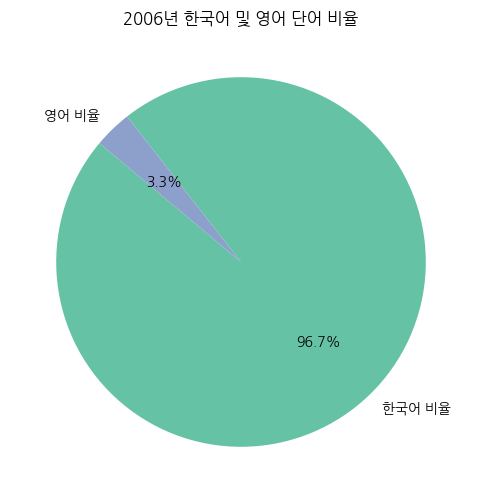

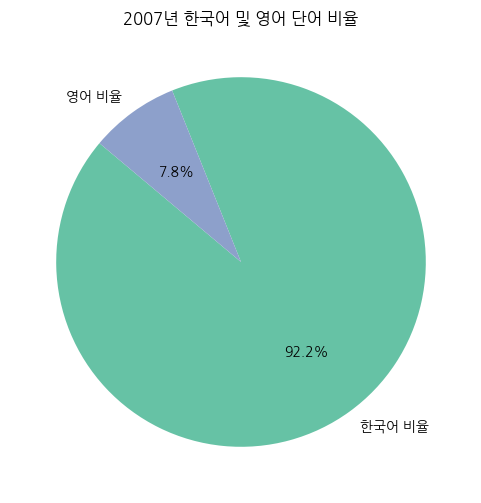

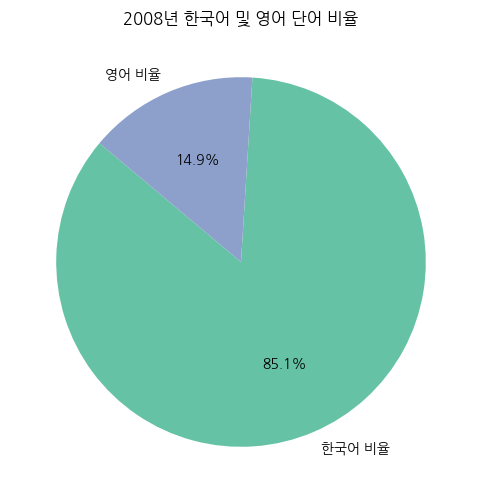

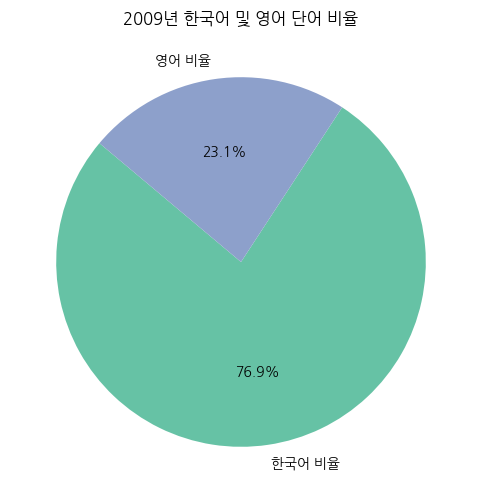

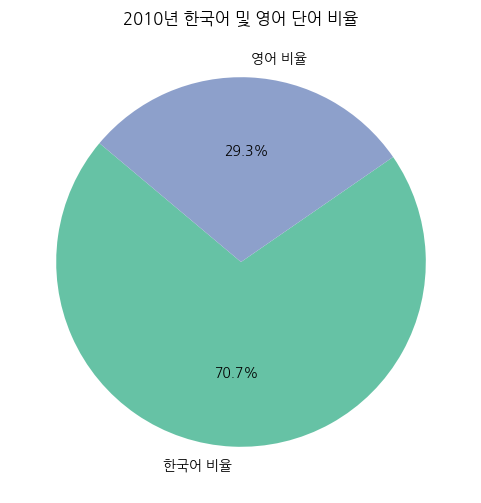

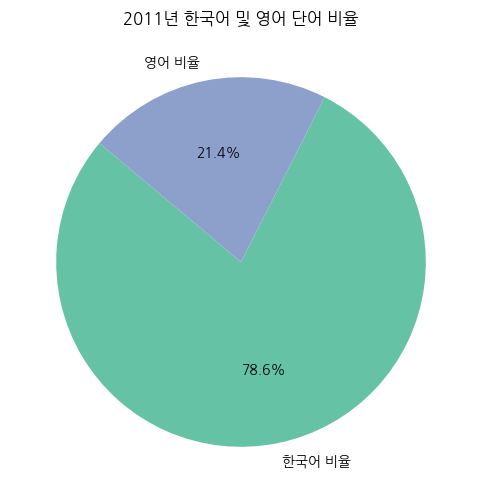

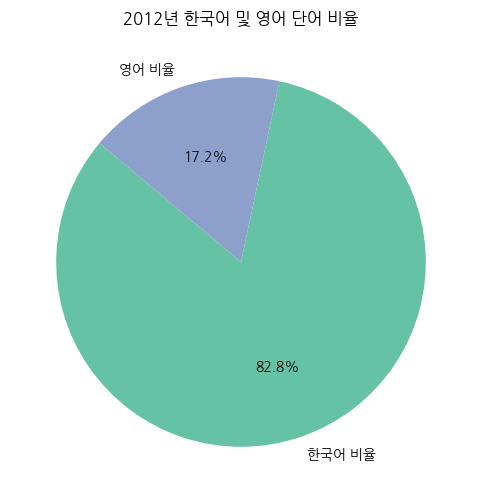

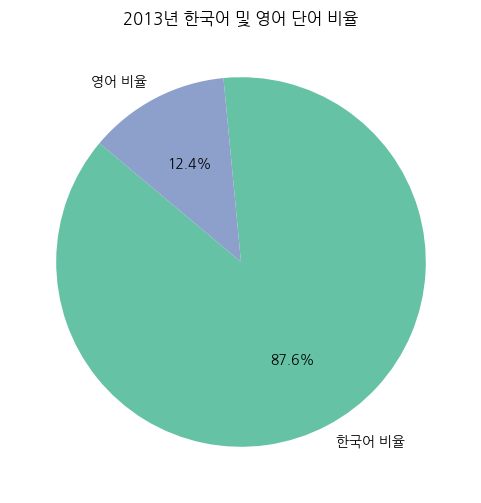

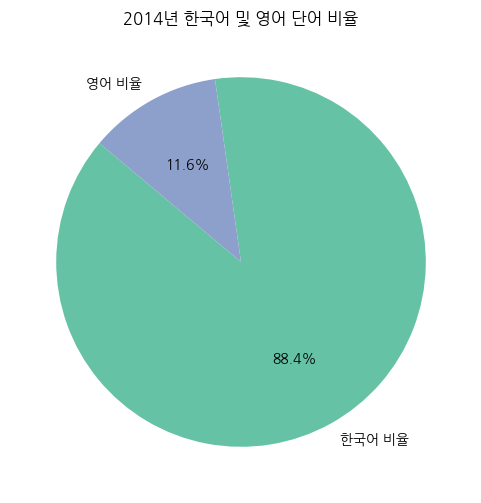

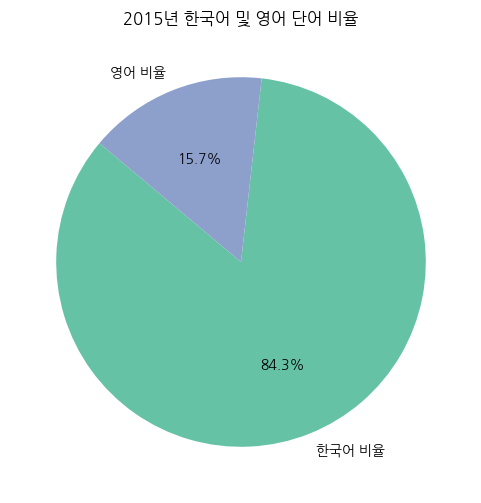

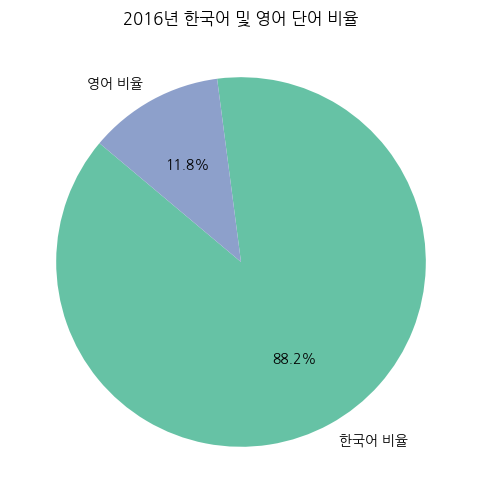

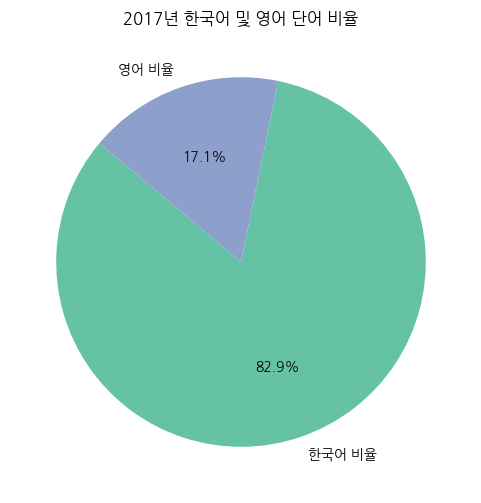

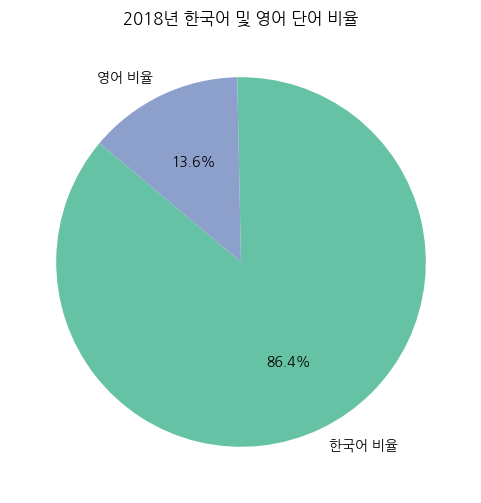

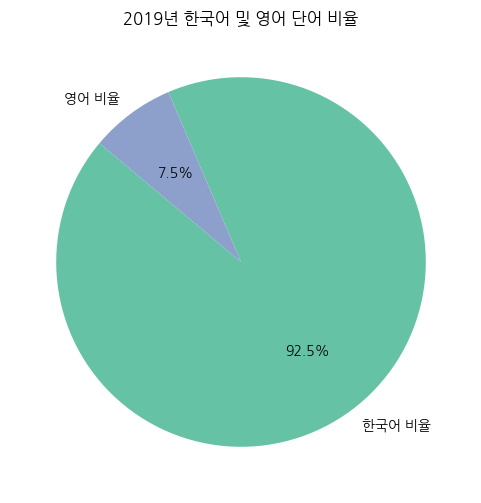

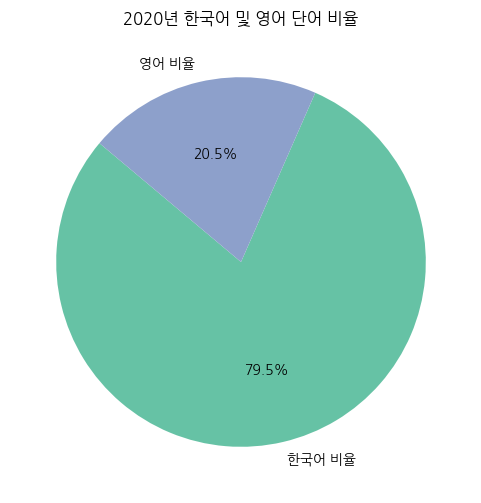

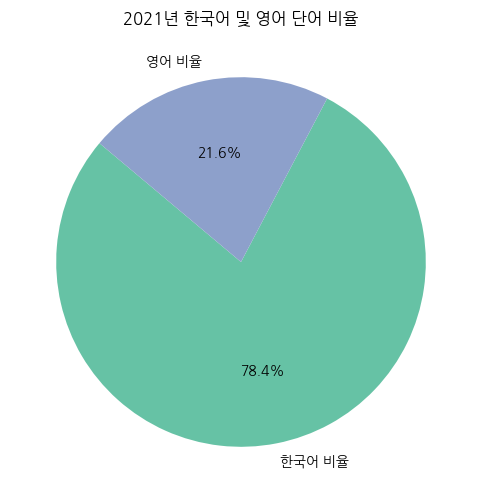

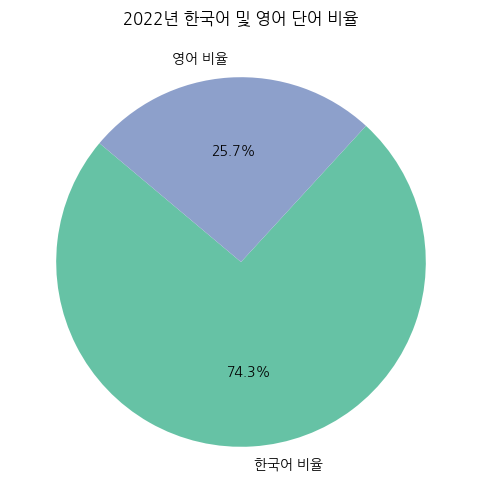

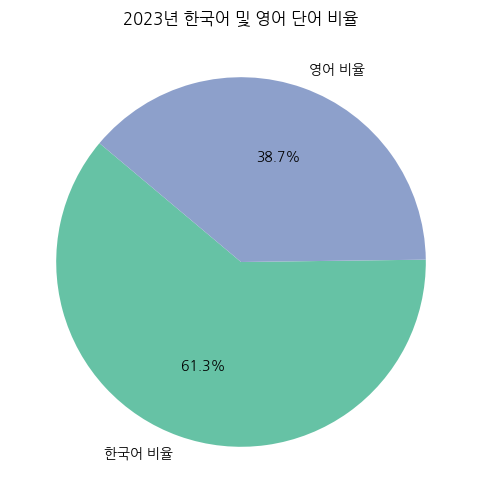

In [ ]:
# 라이브러리 불러오기
import re
from konlpy.tag import Okt

# 형태소 분석기 초기화
okt = Okt()

# 한국어 단어와 영어 단어 비율 계산 함수
def calculate_language_ratio(text):
    # 텍스트가 문자열인지 확인, 아닌 경우 0 비율 반환
    if not isinstance(text, str):
        return 0, 0

    korean_words = 0
    english_words = 0

    # 텍스트 단어 단위로 분리
    words = okt.morphs(text)

    for word in words:
        if re.search(r'[가-힣]', word):  # 한국어 단어
            korean_words += 1
        elif re.search(r'[a-zA-Z]', word):  # 영단어
            english_words += 1

    total_words = korean_words + english_words
    if total_words == 0:
        return 0, 0  # 단어가 없는 경우 비율 0으로 반환

    # 한국어와 영어 단어 비율 계산
    korean_ratio = korean_words / total_words
    english_ratio = english_words / total_words
    return korean_ratio, english_ratio

# 연도 범위 설정
years = range(2003, 2024)

# 연도별 데이터 처리
for year in years:
    # 파일 경로 설정
    file_path = f'/content/drive/MyDrive/DS/최종 프로젝트/감정분석/감정분석_결과_{year}.csv'

    try:
        # 데이터 읽기
        data = pd.read_csv(file_path)

        # 가사별 한국어 단어와 영어 단어 비율 계산
        data['한국어 비율'], data['영어 비율'] = zip(*data['가사'].apply(calculate_language_ratio))

        # 연도별 평균 비율 계산
        korean_avg_ratio = data['한국어 비율'].mean()
        english_avg_ratio = data['영어 비율'].mean()

        # 원형 차트 시각화
        plt.figure(figsize=(6, 6))
        plt.pie(
            [korean_avg_ratio, english_avg_ratio],
            labels=['한국어 비율', '영어 비율'],
            autopct='%1.1f%%',
            startangle=140,
            colors=['#66c2a5', '#8da0cb']
        )
        plt.title(f'{year}년 한국어 및 영어 단어 비율')
        plt.show()

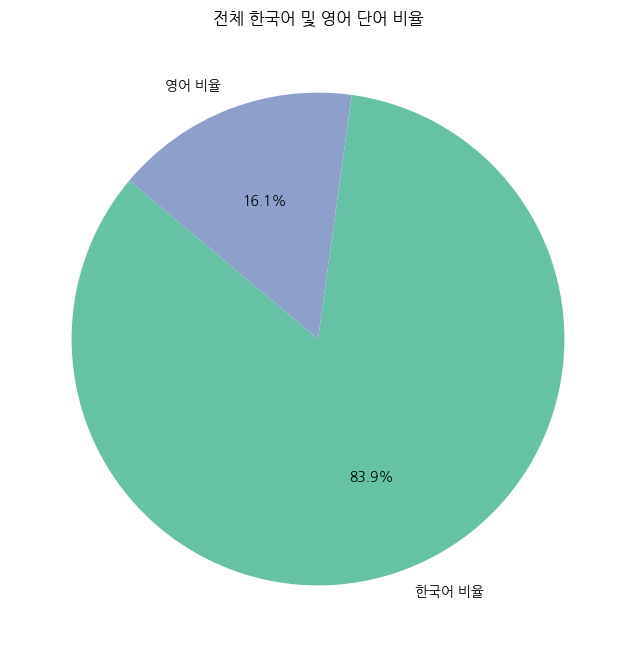

In [ ]:
# 파일 경로 설정
file_path = '/content/drive/MyDrive/DS/최종 프로젝트/감정분석/통합_감정분석_2003~2023.csv'

# 데이터 불러오기
data = pd.read_csv(file_path)

# 형태소 분석기 초기화
okt = Okt()

# 한국어 단어와 영어 단어 비율 계산 함수
def calculate_language_ratio(text):
    # 텍스트가 문자열인지 확인하고, 아닌 경우 0 비율 반환
    if not isinstance(text, str):
        return 0, 0

    korean_words = 0
    english_words = 0

    # 텍스트 단어 단위로 분리
    words = okt.morphs(text)

    for word in words:
        if re.search(r'[가-힣]', word):  # 한국어 단어
            korean_words += 1
        elif re.search(r'[a-zA-Z]', word):  # 영단어
            english_words += 1

    total_words = korean_words + english_words
    if total_words == 0:
        return 0, 0  # 단어가 없는 경우 비율 0으로 반환

    # 한국어와 영어 단어 비율 계산
    korean_ratio = korean_words / total_words
    english_ratio = english_words / total_words
    return korean_ratio, english_ratio

# 가사별 한국어 단어와 영어 단어 비율 계산
data['한국어 비율'], data['영어 비율'] = zip(*data['가사'].apply(calculate_language_ratio))

# 전체 평균 비율 계산
korean_avg_ratio = data['한국어 비율'].mean()
english_avg_ratio = data['영어 비율'].mean()

# 원형 차트 시각화
plt.figure(figsize=(8, 8))
plt.pie(
    [korean_avg_ratio, english_avg_ratio],
    labels=['한국어 비율', '영어 비율'],
    autopct='%1.1f%%',
    startangle=140,
    colors=['#66c2a5', '#8da0cb']
)
plt.title('전체 한국어 및 영어 단어 비율')
plt.show()


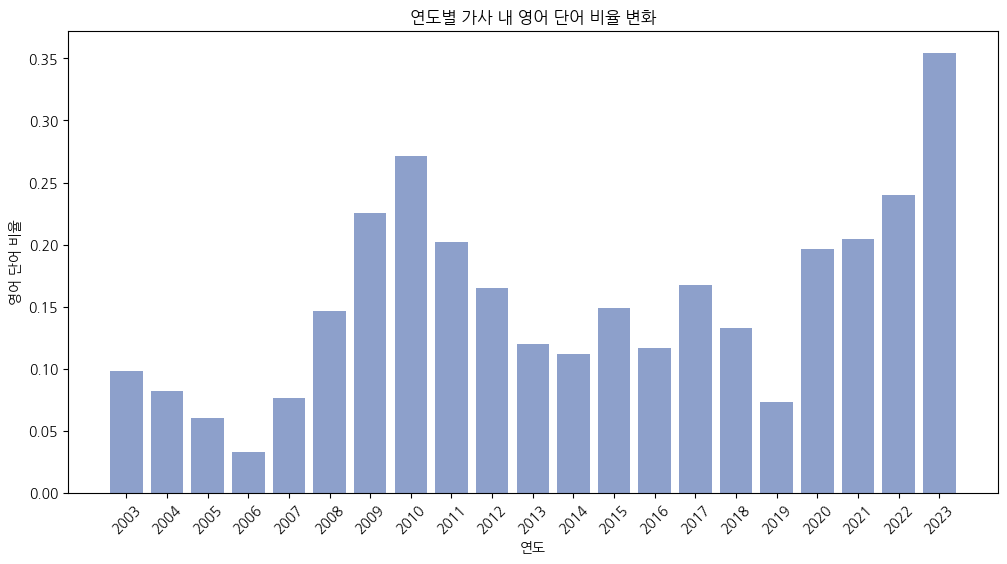

In [ ]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from konlpy.tag import Okt
import koreanize_matplotlib

# 형태소 분석기 초기화
okt = Okt()

# 영어 단어 비율 계산 함수 (영어 비율만 반환)
def calculate_english_ratio(text):
    if not isinstance(text, str):
        return 0  # 문자열이 아닌 경우 영어 비율 0 반환

    korean_words = 0
    english_words = 0

    # 텍스트 형태소 분석
    words = okt.morphs(text)

    for word in words:
        if re.search(r'[a-zA-Z]', word):
            english_words += 1  # 영어 단어 수 증가

    total_words = len(words)  # 전체 단어 수
    if total_words == 0:
        return 0  # 단어가 없는 경우 영어 비율 0 반환

    return english_words / total_words  # 영어 단어 비율 반환

# 연도 범위 설정
years = range(2003, 2024)
english_ratios = []  # 연도별 영어 비율 저장 리스트

# 연도별 데이터 처리
for year in years:
    file_path = f'/content/drive/MyDrive/DS/최종 프로젝트/감정분석/감정분석_결과_{year}.csv'

    try:
        data = pd.read_csv(file_path)
        data['영어 비율'] = data['가사'].apply(calculate_english_ratio)  # 영어 비율 계산

        # 연도별 평균 영어 비율 계산
        english_avg_ratio = data['영어 비율'].mean()
        english_ratios.append(english_avg_ratio)

    except FileNotFoundError:
        print(f"{year}년 데이터 파일이 존재하지 않습니다.")
        english_ratios.append(0)

# 막대 차트 시각화
plt.figure(figsize=(12, 6))
plt.bar(years, english_ratios, color='#8da0cb')
plt.xlabel('연도')
plt.ylabel('영어 단어 비율')
plt.title('연도별 가사 내 영어 단어 비율 변화')
plt.xticks(years, rotation=45)
plt.show()